In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.getcwd()

'C:\\Users\\KIIT\\Documents\\Financial-Sentiment-Analysis'

In [5]:
def merged_data(directory):
    data = pd.DataFrame()
    for i in os.listdir(directory):
        df = pd.read_csv(os.path.join(directory, i))
        data = pd.concat([data, df], axis=0)
    return data


current_dir = os.getcwd()
data_dir = "scraped_data"
dataset = merged_data(directory = os.path.join(current_dir, data_dir))
dataset.shape

(16454, 10)

In [6]:
dataset.head()

,symbol,sentiment,message,datetime,user,username,userfollowers,user_likecount,message_id,message_likes
0,AAPL,Bullish,$AAPL I don’t care if you think I’m nuts but I...,2022-06-12T13:30:23Z,6617635,My_Booger_Collection,113,672,465507534,NaN
1,AAPL,Bullish,$AAPL lotta BS here not focused on Apple!!!\n👁...,2022-06-12T12:54:34Z,5006864,elprup,86,11049,465505268,NaN
2,AAPL,Bullish,$AAPL $SPY $TQQQ $SOXL $AMZN \n🤑 V shape recov...,2022-06-12T11:47:09Z,1381005,Denmark__,297,8779,465502199,NaN
3,AAPL,Bullish,$SPY cryptos dumping so funds can go all in on...,2022-06-12T11:36:50Z,6639146,CapitalPalms,2,78,465501843,NaN
4,AAPL,Bullish,$AAPL $SPY $AMZN $TQQQ $SOXL \nApple Is Seeing...,2022-06-12T11:36:27Z,1381005,Denmark__,296,8779,465501832,NaN


In [7]:
# check duplicacy
dataset.duplicated().sum()

0

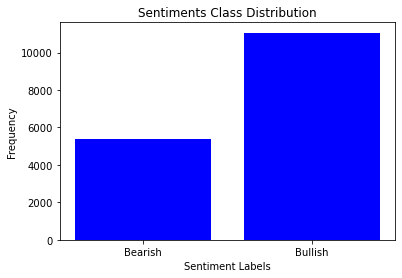

In [8]:
sentiment_types = dataset.groupby("sentiment")["sentiment"].count().to_dict().keys()
sentiment_counts = dataset.groupby("sentiment")["sentiment"].count().to_dict().values()
plt.bar(sentiment_types, sentiment_counts, color="blue")
plt.xlabel("Sentiment Labels")
plt.ylabel("Frequency")
plt.title("Sentiments Class Distribution")
plt.show()

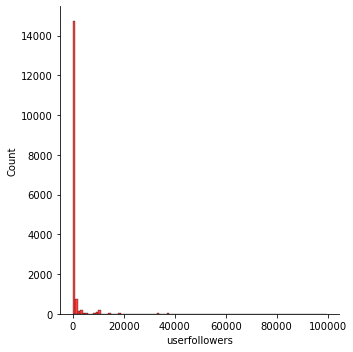

In [9]:
sns.displot(dataset["userfollowers"], bins=100, color="red")
plt.show()

In [10]:
# Take only top author's tweets who have more than 100 followers
top_author_data = dataset[dataset["userfollowers"]>100]
print(top_author_data.shape)

(5114, 10)


In [11]:
# Distribution of sentiment classes in top author subset
top_author_data.groupby("sentiment").agg({"sentiment": "count"})

,sentiment
sentiment,
Bearish,1430
Bullish,3684


In [12]:
# Distribution of companies tweets in top author subset
top_author_data.groupby("symbol").agg({"symbol": "count"})

,symbol
symbol,
AAPL,184
AMZN,200
ASPS,83
BABA,133
BIIB,105
BTC.X,225
CHGG,188
DBX,56
DIS,100


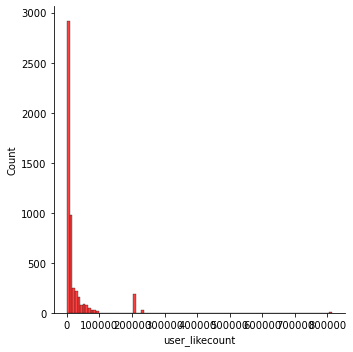

In [13]:
sns.displot(top_author_data["user_likecount"], bins=100, color="red")
plt.show()

In [14]:
# tweets with more than 1K likes
top_author_messages = top_author_data[top_author_data["user_likecount"]>1000]
print(top_author_messages.shape)

(4102, 10)


In [15]:
# Distribution of sentiment classes in top author message subset
top_author_messages.groupby("sentiment").agg({"sentiment": "count"})

,sentiment
sentiment,
Bearish,1072
Bullish,3030


In [16]:
# Distribution of companies tweets in top author subset
top_author_messages.groupby("symbol").agg({"symbol": "count"})

,symbol
symbol,
AAPL,146
AMZN,152
ASPS,55
BABA,118
BIIB,86
BTC.X,222
CHGG,152
DBX,33
DIS,95


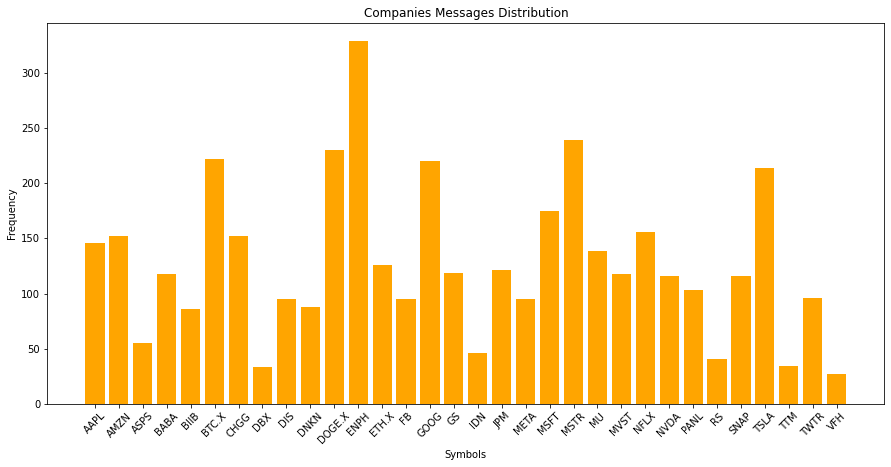

In [17]:
plt.figure(figsize=(15, 7))
symbol_types = top_author_messages.groupby("symbol")["symbol"].count().to_dict().keys()
symbol_counts = top_author_messages.groupby("symbol")["symbol"].count().to_dict().values()
plt.bar(symbol_types, symbol_counts, color="orange")
plt.xlabel("Symbols")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.title("Companies Messages Distribution")
plt.show()

In [18]:
top_author_messages.reset_index(0, drop=True, inplace=True)

In [19]:
top_author_messages.head()

,symbol,sentiment,message,datetime,user,username,userfollowers,user_likecount,message_id,message_likes
0,AAPL,Bullish,$AAPL $SPY $TQQQ $SOXL $AMZN \n🤑 V shape recov...,2022-06-12T11:47:09Z,1381005,Denmark__,297,8779,465502199,NaN
1,AAPL,Bullish,$AAPL $SPY $AMZN $TQQQ $SOXL \nApple Is Seeing...,2022-06-12T11:36:27Z,1381005,Denmark__,296,8779,465501832,NaN
2,AAPL,Bullish,$AMZN $SPY $AAPL $GOOGL $TQQQ \n🎉 Wow~ Amazon&...,2022-06-12T10:23:54Z,1381005,Denmark__,297,8779,465499835,NaN
3,AAPL,Bullish,$SPY $GOOGL $AMZN $AAPL $TQQQ\nWow~~ Google PT...,2022-06-12T10:05:44Z,1381005,Denmark__,296,8779,465499462,NaN
4,AAPL,Bearish,$BTC.X $SPY $DWAC $AAPL $TSLA \n\nNever undere...,2022-06-12T02:36:47Z,216765,Honest_Abe,317,11269,465481286,NaN


In [53]:
#os.makedirs("data")
#top_author_messages.to_csv("./data/processed.csv", index=False)